Chris
Results found in file a-0.png


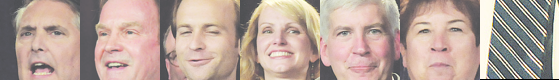

Results found in file a-3.png


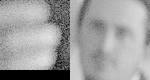

In [1]:
import zipfile
import io
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

#zip_lt=[]
img_dt={}
txt_dt={}

face_dt={}

contact_sheet_dt={}

z_file = zipfile.ZipFile('small_img.zip')

#for item in z_file.infolist():
#    zip_lt.append(item)
    
for file in z_file.namelist():
    #extract file from zip in memory
    get_img = z_file.read(file)

    # then as a flie type handle
    fh = io.BytesIO(get_img)
    img = Image.open(fh).convert('RGB')
    img_dt[file] = img
    
    # crop face
    face_lt=[]
    img.save("tmp.png")
    cv_img=cv.imread('tmp.png')
    gray_img = cv.cvtColor(cv_img, cv.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.22, minNeighbors=5)
    for x,y,w,h in faces:
        # Now lets crop the image
        face_img=img.crop((x,y,x+w,y+h))
        # make this image into a thumbnail, newsize decide the size of single face_img
        newsize = 80, 80
        face_img.thumbnail(newsize)
        # save face img into a list and then store the list into a dict
        face_lt.append(face_img)
    face_dt[file]=face_lt
    
    
    # make a contact sheet
    max_height = 0
    width_sum = 0
    
    for i in range(len(face_dt[file])):
        if face_dt[file][i].height > max_height:
            max_height = face_dt[file][i].height
        width_sum += face_dt[file][i].width  # canvas width

    contact_sheet=Image.new(face_dt[file][0].mode, (width_sum, max_height))
    
    # canvas start original point
    x=0
    y=0

    for index in range(len(face_dt[file])):
        contact_sheet.paste(face_dt[file][index], (x,y))
        x += face_dt[file][index].width

    #print(f'Results found in file {file}')
    #display(contact_sheet)
    contact_sheet_dt[file] = contact_sheet

# text detect and map text with corresponding contact_sheet image
for key in img_dt:
    text = pytesseract.image_to_string(img_dt[key])
    txt_dt[key] = text
    
# user input keyword and then return corresponding contact_sheet image
search = input()
for key2 in txt_dt:
    if search in txt_dt[key2]:
        try:
            print(f'Results found in file {key2}')
            display(contact_sheet_dt[key2])
        except:
            print("But there were no faces in that file!")



Mark
Results found in file a-0.png


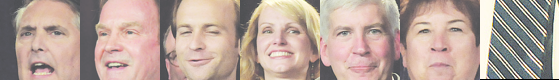

Results found in file a-1.png


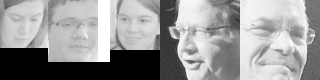

Results found in file a-2.png


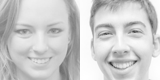

Results found in file a-3.png


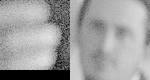

In [2]:
search = input()
for key2 in txt_dt:
    if search in txt_dt[key2]:
        try:
            print(f'Results found in file {key2}')
            display(contact_sheet_dt[key2])
        except:
            print("But there were no faces in that file!")